3.1 Getting started with Data Exploration-Warm up.

DataSet Overview
Load the DataSet and display the first 10 rows.

In [55]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#load the dataset
#Reading the CSV file into a DataFrame
whr_data=pd.read_csv('/content/drive/MyDrive/Assignment-1/WHR-2024-5CS037.csv')
#Displaying the first 10 rows to understand the structure of the dataset
print("First 10 rows of dataset:")
print(whr_data.head(10))

First 10 rows of dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3             

2.Identify the numbers of rows and column in the dataset.


In [57]:
#Checking the size of dataset
rows,cols=whr_data.shape
print(f"The dataset contains {rows} rows and {cols} columns.")


The dataset contains 143 rows and 9 columns.


3.List all the columns and their data types.

In [58]:
#Listing all column names and their data types
print("Columns and their data types:")
print(whr_data.dtypes)

Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


Basic Statistics
1. Calculate the mean median and the standard deviation for the score column.

In [59]:
#Basic statistics for the 'Score' column
mean_score=whr_data['score'].mean()
median_score=whr_data['score'].median()
std_dev_score=whr_data['score'].std()
print(f"Mean Score is {mean_score}")
print(f"Median Score is {median_score}")
print(f"Standard Deviation of Score is {std_dev_score}")

Mean Score is 5.52758041958042
Median Score is 5.785
Standard Deviation of Score is 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [60]:
#Identifying the countries with the highest and lowest happiness scores
highest_country=whr_data.loc[whr_data['score'].idxmax(),'Country name']
lowest_country=whr_data.loc[whr_data['score'].idxmin(),'Country name']
print(f"The happiest country is: {highest_country}")
print(f"The least happy country is: {lowest_country}")

The happiest country is: Finland
The least happy country is: Afghanistan


Missing Values
1. check if there are any missing values in the Dataset. If so, display the total count for each column.

In [61]:
#Checking for missing values
missing_values=whr_data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values>0])

Missing values in each column:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


 Filtering and sorting

1. Filter the dataset to show only the countries with a score greater than 7.5

In [62]:
# Filtering the dataset to include only countries with a Score > 7.5
filtered_df=whr_data[whr_data['score']>7.5]
print("Countries with Score greater than 7.5:")
print(filtered_df)

Countries with Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


2. For the filtered dataset- sort the dataset by the GDP per caita in the descending order and display the top 10 rows

In [63]:
#Sorting the filtered data by 'Log GDP per capita' in descending order
#and displaying the top 10 rows
sorted_df=filtered_df.sort_values('Log GDP per capita',ascending=False)
print("Top 10 countries sorted by GDP per capita:")
print(sorted_df.head(10))

Top 10 countries sorted by GDP per capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


 Adding new Columns:
1. Create a new columns called Happiness_category that categories countries into the categories based on their score. Low_(score<4) Medium_(4-score<-6) High_(score>6)

In [64]:
# Adding a 'Happiness Category' column based on the Score
def categorize_happiness(score):
    if score<4:
        return 'Low'
    elif 4<=score<=6:
        return 'Medium'
    else:
        return 'High'
#Applying the function to create the new column
whr_data['Happiness Category']=whr_data['score'].apply(categorize_happiness)
print("Updated dataset with 'Happiness Category':")
print(whr_data[['Country name','score','Happiness Category']])

Updated dataset with 'Happiness Category':
         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


2. Data Visualization.

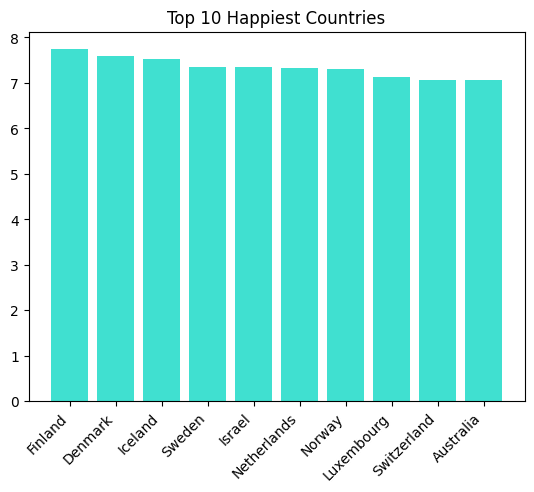

In [65]:
#Bar Plot:Top 10 happiest countries
top_10_happy=whr_data.nlargest(10, 'score')
plt.bar(top_10_happy['Country name'],top_10_happy['score'],color='turquoise')
plt.title('Top 10 Happiest Countries')
plt.xticks(rotation=45,ha='right')
plt.show()

Line Plot

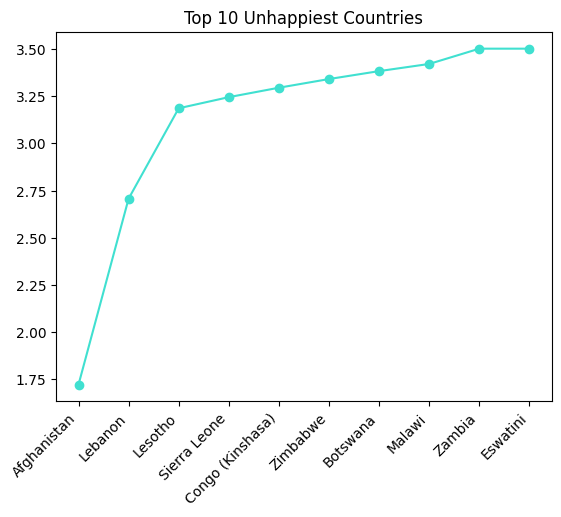

In [66]:
#Line Plot:Top 10 unhappiest countries
top_10_unhappy=whr_data.nsmallest(10,'score')
plt.plot(top_10_unhappy['Country name'],top_10_unhappy['score'],marker='o',color='turquoise')
plt.title('Top 10 Unhappiest Countries')
plt.xticks(rotation=45,ha='right')
plt.show()

Plot a Histogram

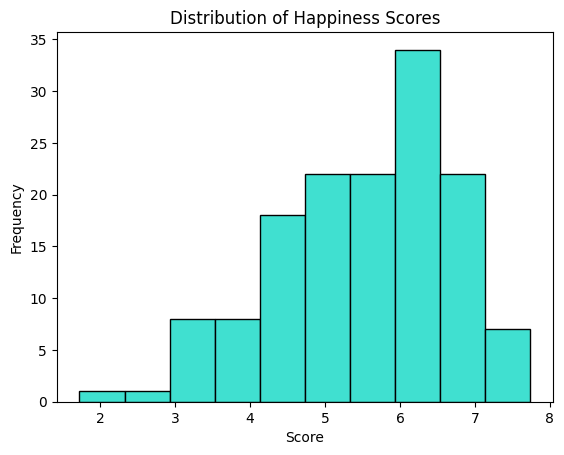

In [67]:
#Histogram:Distribution of 'Score'
plt.hist(whr_data['score'],bins=10,color='turquoise',edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


Scatter plot

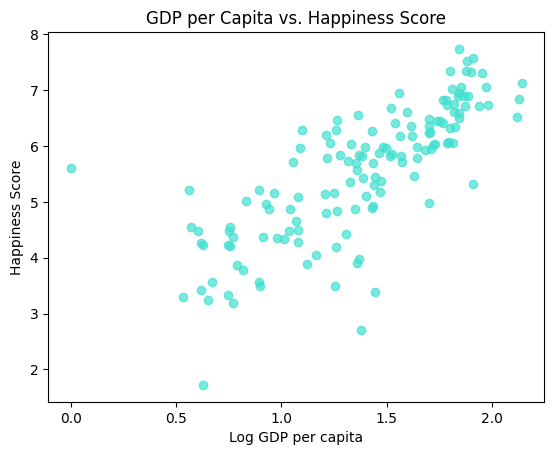

In [68]:
#Scatter Plot:GDP per Capita vs.Score
plt.scatter(whr_data['Log GDP per capita'],whr_data['score'],color='turquoise',alpha=0.7)
plt.title('GDP per Capita vs. Happiness Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.show()

3.2 Problem 2 Some Advance Data Exploration Task Task-1. Setup-Task- Preparing the South-Asia DataSet

1. Define the countries in South-Asia with a list for example.
2. Use the list from Step-1 to filter the dataset(i.e. filter out the matching dataset from the list)

In [69]:
#1.defining South Asian countries
south_asia_countries=[
    "Afghanistan", "Bangladesh", "Bhutan",
    "India", "Maldives", "Nepal",
    "Pakistan", "Srilanka"
]

#2.filtering dataset
#Using the list above to create a new dataset with only South Asian countries
south_asia_data=whr_data[whr_data['Country name'].isin(south_asia_countries)]

#quick look at South Asian dataset
print("Filtered dataset for South Asian countries:")
print(south_asia_data.head())  # Displaying the first few rows

#3.saving the dataset to a CSV file for future investigation
output_file="South_Asia_Filtered.csv"
south_asia_data.to_csv(output_file,index=False)
print(f"The filtered dataset has been saved to '{output_file}'")


Filtered dataset for South Asian countries:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783        

Task-2 Composite Score Ranking Tasks:

1. Using the SouthAsia Dataframe create a new column called composite score that combines the following metrices.

South Asian countries ranked by Composite Score:
  Country name  Composite Score
0        Nepal           0.8159
1        India           0.7874
2     Pakistan           0.7039
3   Bangladesh           0.6774
4  Afghanistan           0.3238


<ipython-input-70-f7bc58327802>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['Composite Score']=(


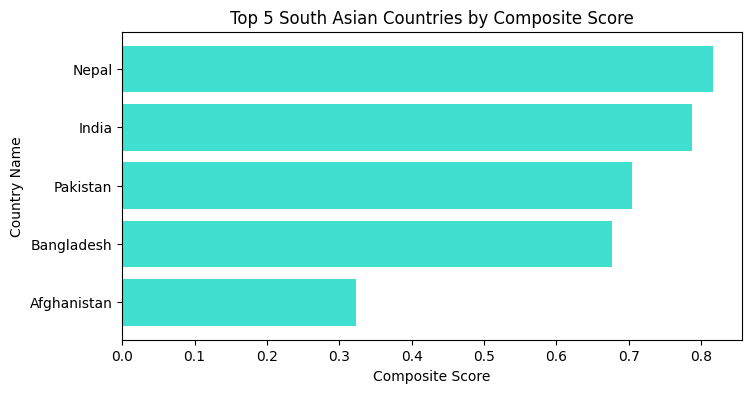

In [70]:
#1.Creating a composite score for South Asian countries
#Formula is Composite Score =0.40*Log GDP per Capita+0.30*Social Support+0.30*Healthy Life Expectancy
south_asia_data['Composite Score']=(
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)
#2.Ranking countries based on the Composite Score in descending order
#Sorting the dataframe by 'Composite Score' and resetting the index
south_asia_data=south_asia_data.sort_values(by='Composite Score',ascending=False).reset_index(drop=True)

#3.Displaying the top-ranked countries
print("South Asian countries ranked by Composite Score:")
print(south_asia_data[['Country name', 'Composite Score']].head())  # Displaying the top 5

#Selecting the top 5 countries for visualization
top_5_countries=south_asia_data.head(5)

plt.figure(figsize=(8,4))
plt.barh(top_5_countries['Country name'],top_5_countries['Composite Score'],color='turquoise')
plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()# To display the highest scorer at the top
plt.show()


Task-3 Outliner Detection: Tasks:

1. Identify outliner countries in South Asia based on their score and GDP per capita.

Outliers based on Score:
  Country name  score
4  Afghanistan  1.721

Outliers based on GDP per Capita:
  Country name  Log GDP per capita
4  Afghanistan               0.628


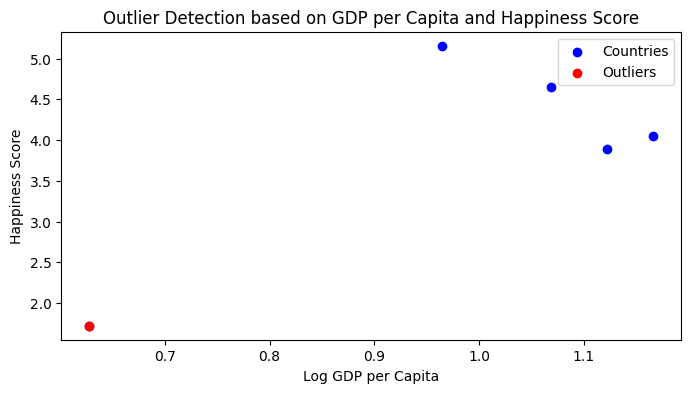

In [71]:
# Defining a function to detect outliers using the 1.5 * IQR rule
def detect_outliers(df,column):
    Q1=south_asia_data[column].quantile(0.25)  # Calculate Q1 based on the given dataframe
    Q3=south_asia_data[column].quantile(0.75)  # Calculate Q3 based on the given dataframe
    IQR=Q3-Q1
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    outliers=south_asia_data[(south_asia_data[column] < lower_bound) | (south_asia_data[column] > upper_bound)]
    return outliers

# Detecting outliers in 'score' and 'Log GDP per capita'
outliers_score=detect_outliers(south_asia_data, 'score')
outliers_gdp=detect_outliers(south_asia_data, 'Log GDP per capita')

# Showing outliers in 'score' and 'Log GDP per capita'
print("Outliers based on Score:")
print(outliers_score[['Country name', 'score']])

print("\nOutliers based on GDP per Capita:")
print(outliers_gdp[['Country name', 'Log GDP per capita']])

# Visualizing outliers using a scatter plot
plt.figure(figsize=(8,4))
plt.scatter(south_asia_data['Log GDP per capita'], south_asia_data['score'],label='Countries',color='blue')

# Highlighting outliers
plt.scatter(outliers_score['Log GDP per capita'], outliers_score['score'],color='red',label='Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Outlier Detection based on GDP per Capita and Happiness Score')
plt.legend()
plt.show()
#Afganhistan has the lowest value for happiness score(1.721) and GDP per capita(0.628) which
#indicates country's socio-econonic challenges
#these extreme values can influence regional averages especially the mean
#median might give more accurate picture of Afghanistan's overall happiness and
#economic status
#Low GDP and happiness score might be the reflection of political instability in
#the country


Task-4 Exploring Trends Across Metrices Tasks:

1. Choose two metrices(e.g Freedom to Make Life Choice and Generosity) and calculate their correlation(Pearson correlation) with the score for the south asian countries.

Pearson correlation between 'Freedom to Make Life Choices' and 'Score':0.801497903141921
Pearson correlation between 'Generosity' and 'Score':0.8773326267276359


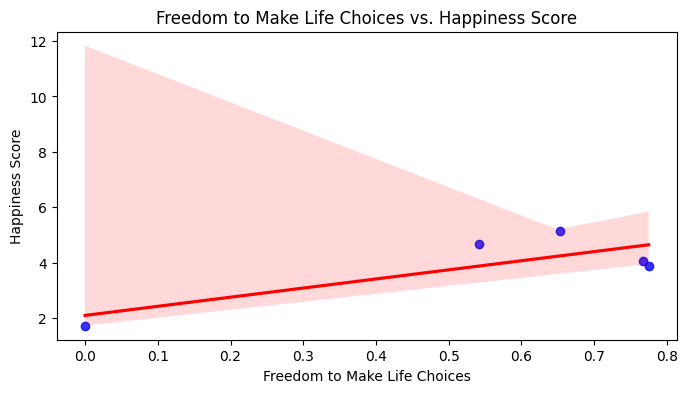

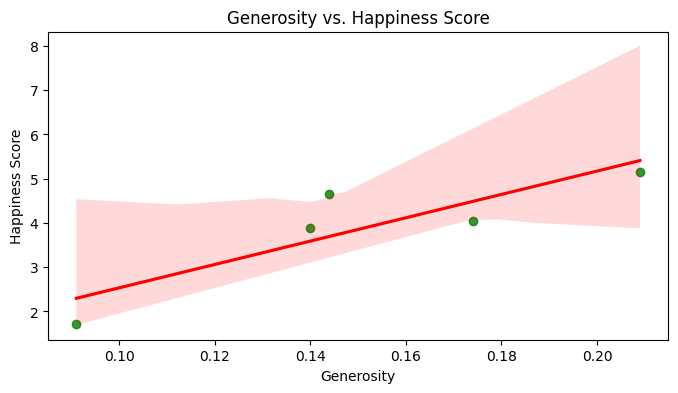

In [72]:
#1.Choosing two metrics (Freedom to Make Life Choices and Generosity)
#and calculating their correlation with the Score

#Pearson correlation between Score and 'Freedom to Make Life Choices'
correlation_freedom_score=south_asia_data['Freedom to make life choices'].corr(south_asia_data['score'])
print(f"Pearson correlation between 'Freedom to Make Life Choices' and 'Score':{correlation_freedom_score}")

#Pearson correlation between Score and 'Generosity'
correlation_generosity_score=south_asia_data['Generosity'].corr(south_asia_data['score'])
print(f"Pearson correlation between 'Generosity' and 'Score':{correlation_generosity_score}")

#2.Creating scatter plots with trendlines for these metrics against the Score
import seaborn as sns

#Scatter plot for 'Freedom to Make Life Choices' vs. Score with a trendline
plt.figure(figsize=(8,4))
sns.regplot(x='Freedom to make life choices',y='score',data=south_asia_data,scatter_kws={'color': 'blue'},line_kws={'color': 'red'})
plt.title("Freedom to Make Life Choices vs. Happiness Score")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Happiness Score")
plt.show()

#Scatter plot for 'Generosity' vs. Score with a trendline
plt.figure(figsize=(8,4))
sns.regplot(x='Generosity',y='score',data=south_asia_data,scatter_kws={'color': 'green'},line_kws={'color': 'red'})
plt.title("Generosity vs. Happiness Score")
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.show()


Task-5 Gap Analysis Tasks:

1. Add a new column,GD score Gap, which is the difference between GDP per capita and the score for each South Asian Country

Countries with the largest negative GDP-Score Gap:
  Country name  GDP-Score Gap
0        Nepal         -4.193
2     Pakistan         -3.588
1        India         -2.888

Countries with the largest positive GDP-Score Gap:
  Country name  GDP-Score Gap
4  Afghanistan         -1.093
3   Bangladesh         -2.764
1        India         -2.888


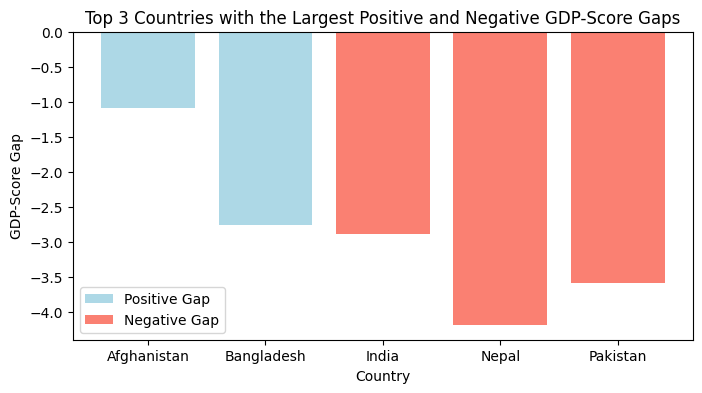

In [73]:
#1.Adding a new column to 'GDP-Score Gap', which is the difference between GDP per Capita and the Score
south_asia_data['GDP-Score Gap']=south_asia_data['Log GDP per capita']-south_asia_data['score']

#2.Ranking the South Asian countries by this gap in both ascending and descending order
ascending_gap=south_asia_data[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap',ascending=True)
descending_gap=south_asia_data[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap',ascending=False)

#Displaying the countries with the largest positive and negative gaps
print("Countries with the largest negative GDP-Score Gap:")
print(ascending_gap.head(3))
print("\nCountries with the largest positive GDP-Score Gap:")
print(descending_gap.head(3))
#3.Highlighting the top 3 countries with the largest positive and negative gaps using a bar chart
plt.figure(figsize=(8, 4))
#Combining both positive and negative gaps for plotting
top_positive=descending_gap.head(3)
top_negative=ascending_gap.head(3)
#Creating the bar chart
plt.bar(top_positive['Country name'],top_positive['GDP-Score Gap'],color='lightblue', label='Positive Gap')
plt.bar(top_negative['Country name'],top_negative['GDP-Score Gap'],color='salmon', label='Negative Gap')
#Adding titles and labels
plt.title("Top 3 Countries with the Largest Positive and Negative GDP-Score Gaps")
plt.xlabel("Country")
plt.ylabel("GDP-Score Gap")
plt.legend()
#Show the chart
plt.show()
#nepal,india,pakistan have higher negative gap even though they have higher gdp and the citizens are
#less happy.political instability,social issues,inequality,caste discrimination are the
#reason behind overall wellbeing of citizens.
#afghanistan,bangladesh has smaller positive gap which means they are more happier
#compared to their lower GDP.Community values and social improvement might be the reason
#behind good wellbeing.
#larger negative gap countries needs to address the political stability,social inequality,
#remove caste discrimination and use wealth in good way to improve happiness.
#smaller positive gap countries should continous focusing on social support and
#community development for more improvement.


3.3 Problem-3 Comparative Analysis Task-1 Setup Tasks-Preparing the middle Eastern Dataset Tasks: Similar in Task-1 of problem-2 create a dataframe from the middle eastern countries for the hint use the following lists.

In [74]:
# 1.A list of Middle Eastern countries
middle_east_countries=["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

#Filtering the dataset to include only Middle Eastern countries
middle_east_data=whr_data[whr_data['Country name'].isin(middle_east_countries)]

#Displaying the first few rows of the filtered Middle Eastern dataset
middle_east_data.head()

#Saving the filtered dataset to the current directory
middle_east_data.to_csv('middle_east_data.csv',index=False)


Complete the following tasks:

1. Descriptive Statistics:

In [75]:
#1.Calculating the mean and standard deviation of the Score for South Asia
south_asia_mean_score=south_asia_data['score'].mean()
south_asia_std_score=south_asia_data['score'].std()

#Calculating the mean and standard deviation of the Score for the Middle East
middle_east_mean_score=middle_east_data['score'].mean()
middle_east_std_score=middle_east_data['score'].std()
# Printing the results
print("South Asia - Mean Score:",south_asia_mean_score,"Standard Deviation:",south_asia_std_score)
print("Middle East - Mean Score:",middle_east_mean_score,"Standard Deviation:",middle_east_std_score)
#Comparison - Which region has higher happiness scores on average?
if south_asia_mean_score>middle_east_mean_score:
    print("South Asia has higher happiness scores on average.")
else:
    print("Middle East has higher happiness scores on average.")


South Asia - Mean Score: 3.8952 Standard Deviation: 1.3160025455902433
Middle East - Mean Score: 5.412100000000001 Standard Deviation: 1.5662011684327144
Middle East has higher happiness scores on average.


2. Top and Bottom Performer

South Asia - Top 3 countries:
  Country name  score
0        Nepal  5.158
2     Pakistan  4.657
1        India  4.054

South Asia - Bottom 3 countries:
  Country name  score
4  Afghanistan  1.721
3   Bangladesh  3.886
1        India  4.054

Middle East - Top 3 countries:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Middle East - Bottom 3 countries:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


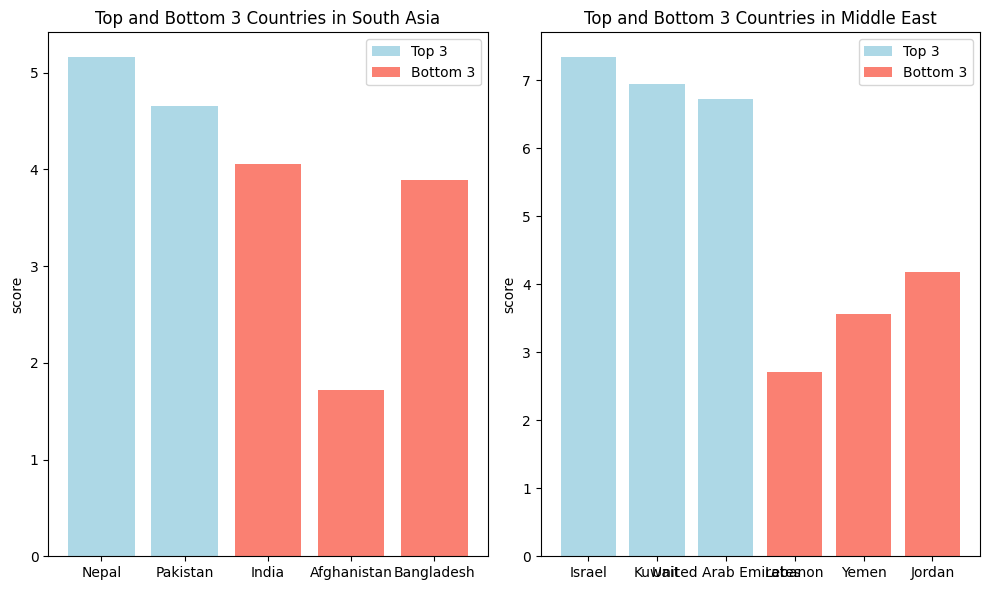

In [76]:
#Identifying the top 3 and bottom 3 countries based on Score for South Asia
south_asia_top3=south_asia_data.nlargest(3, 'score')[['Country name','score']]
south_asia_bottom3=south_asia_data.nsmallest(3, 'score')[['Country name','score']]

#Identifying the top 3 and bottom 3 countries based on Score for the Middle East
middle_east_top3=middle_east_data.nlargest(3, 'score')[['Country name', 'score']]
middle_east_bottom3=middle_east_data.nsmallest(3, 'score')[['Country name', 'score']]

#Printing the results
print("South Asia - Top 3 countries:")
print(south_asia_top3)
print("\nSouth Asia - Bottom 3 countries:")
print(south_asia_bottom3)

print("\nMiddle East - Top 3 countries:")
print(middle_east_top3)
print("\nMiddle East - Bottom 3 countries:")
print(middle_east_bottom3)

#Plot bar charts comparing the top and bottom performers for both regions
#Bar chart for South Asia
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(south_asia_top3['Country name'],south_asia_top3['score'],color='lightblue',label='Top 3')
plt.bar(south_asia_bottom3['Country name'],south_asia_bottom3['score'],color='salmon',label='Bottom 3')
plt.title("Top and Bottom 3 Countries in South Asia")
plt.ylabel("score")
plt.legend()

#Bar chart for Middle East
plt.subplot(1,2,2)
plt.bar(middle_east_top3['Country name'],middle_east_top3['score'],color='lightblue',label='Top 3')
plt.bar(middle_east_bottom3['Country name'],middle_east_bottom3['score'],color='salmon',label='Bottom 3')
plt.title("Top and Bottom 3 Countries in Middle East")
plt.ylabel("score")
plt.legend()

plt.tight_layout()
plt.show()


Metric comparison

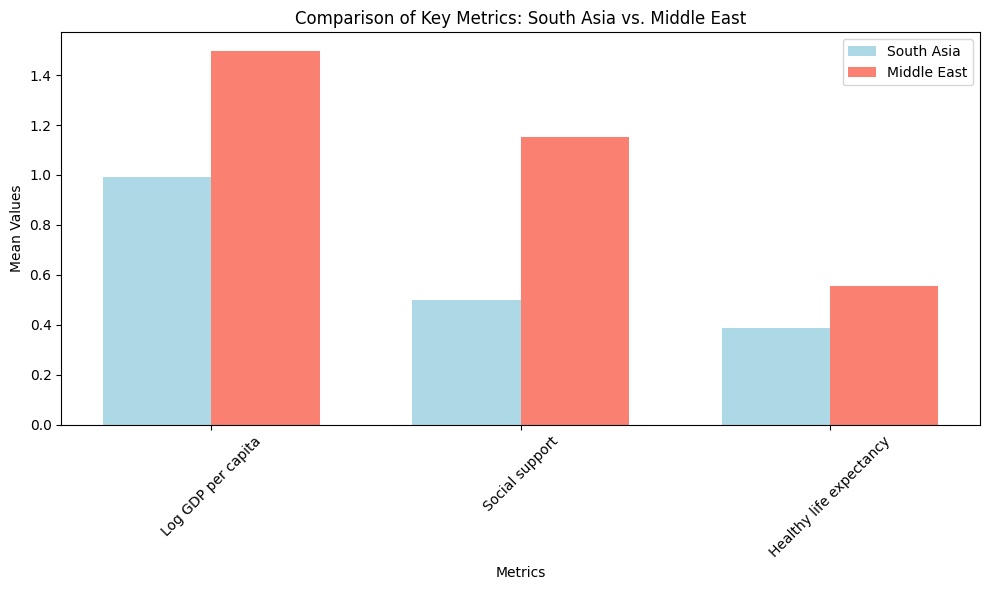

The metric with the largest disparity is 'Social support' with a difference of 0.65.


In [77]:
#Calculating the mean values for metrics in South Asia and Middle East
metrics=['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_means=south_asia_data[metrics].mean()
middle_east_means=middle_east_data[metrics].mean()

# Creating a DataFrame to compare
comparison_df=pd.DataFrame({
    'South Asia': south_asia_means,
    'Middle East': middle_east_means
}).T

# Calculating disparity between the regions
disparity=abs(south_asia_means - middle_east_means)

# Plot grouped bar chart
bar_width=0.35
index=np.arange(len(metrics))

plt.figure(figsize=(10, 6))

# South Asia bars
plt.bar(index - bar_width/2,comparison_df.loc['South Asia'],bar_width,label='South Asia',color='lightblue')

# Middle East bars
plt.bar(index + bar_width/2,comparison_df.loc['Middle East'],bar_width, label='Middle East',color='salmon')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.title('Comparison of Key Metrics: South Asia vs. Middle East')
plt.xticks(index,metrics,rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Displaying the metric with the largest disparity
largest_disparity_metric=disparity.idxmax()
largest_disparity_value=disparity.max()

print(f"The metric with the largest disparity is '{largest_disparity_metric}' with a difference of {largest_disparity_value:.2f}.")


Happiness disparity

In [78]:
#Calculating the Range (Max-Min) for Score in South Asia and Middle East
south_asia_score_range=south_asia_data['score'].max()-south_asia_data['score'].min()
middle_east_score_range=middle_east_data['score'].max()-middle_east_data['score'].min()

#Calculating the Coefficient of Variation (CV) for Score in South Asia and Middle East
south_asia_score_cv=south_asia_data['score'].std()/south_asia_data['score'].mean()
middle_east_score_cv=middle_east_data['score'].std()/middle_east_data['score'].mean()

#Displaying the results
print(f"South Asia Score Range:{south_asia_score_range}")
print(f"Middle East Score Range:{middle_east_score_range}")

print(f"South Asia Score Coefficient of Variation:{south_asia_score_cv:.2f}")
print(f"Middle East Score Coefficient of Variation:{middle_east_score_cv:.2f}")


South Asia Score Range:3.4370000000000003
Middle East Score Range:4.634
South Asia Score Coefficient of Variation:0.34
Middle East Score Coefficient of Variation:0.29


Correlation Analysis

South Asia - Pearson Correlation between Score and Freedom to Make Life Choices:  0.8014979031419212
South Asia - Pearson Correlation between Score and Generosity:  0.877332626727636
Middle East - Pearson Correlation between Score and Freedom to Make Life Choices:  0.8632202433827542
Middle East - Pearson Correlation between Score and Generosity:  0.627523653696418


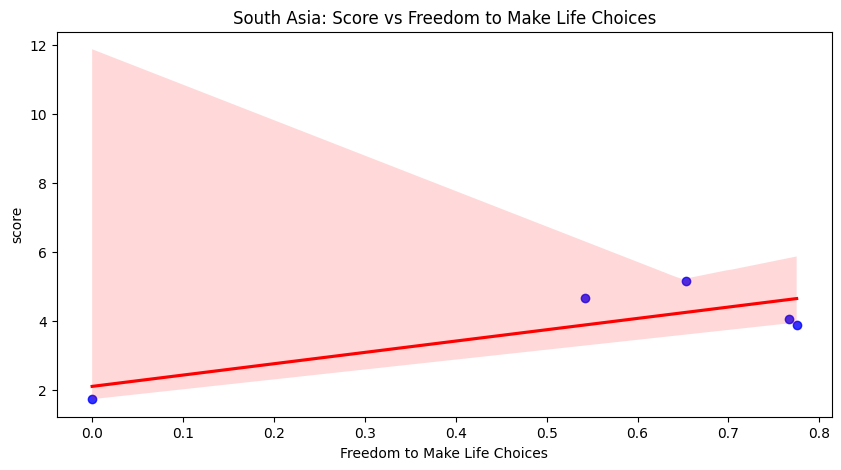

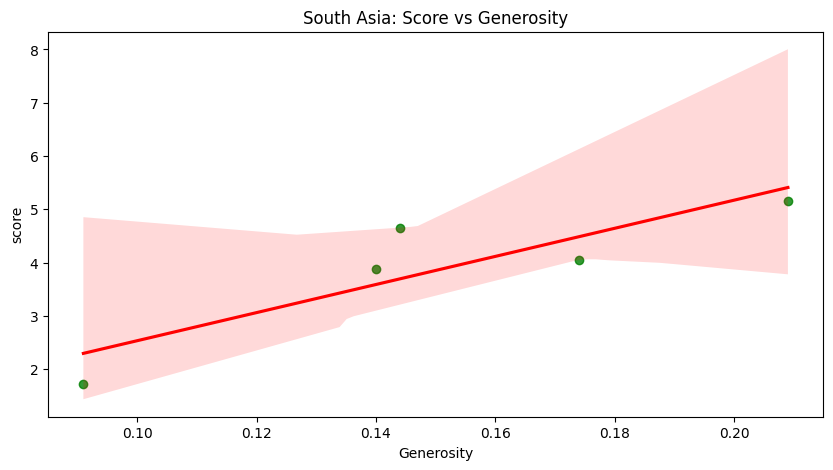

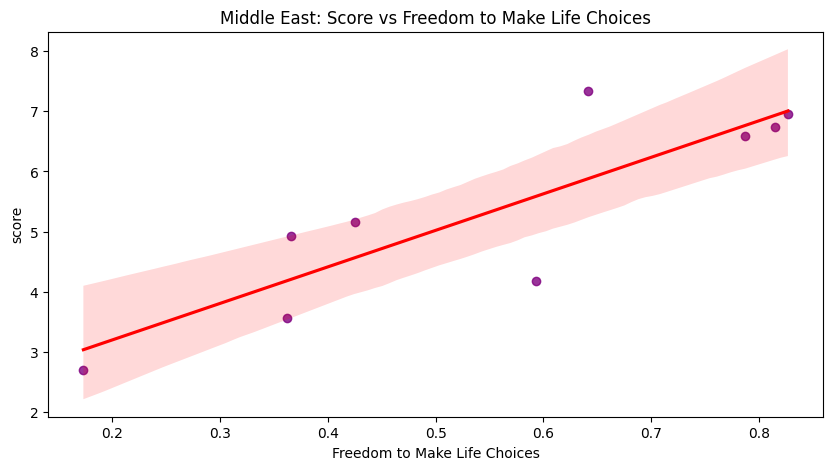

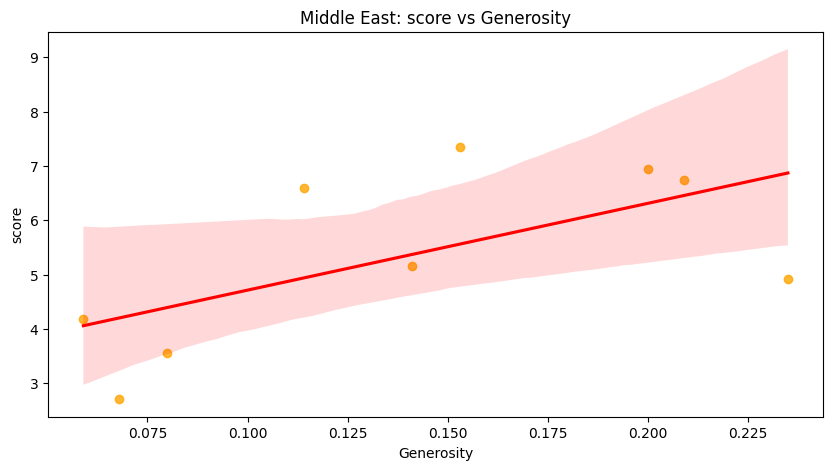

In [79]:
#Calculating Pearson Correlation for Score with selected metrics

#South Asia Correlation
south_asia_corr_freedom=south_asia_data[['score', 'Freedom to make life choices']].corr(method='pearson')
south_asia_corr_generosity=south_asia_data[['score', 'Generosity']].corr(method='pearson')

#Middle East Correlation
middle_east_corr_freedom=middle_east_data[['score', 'Freedom to make life choices']].corr(method='pearson')
middle_east_corr_generosity=middle_east_data[['score', 'Generosity']].corr(method='pearson')

#Displaying the correlation results
print("South Asia - Pearson Correlation between Score and Freedom to Make Life Choices: ",south_asia_corr_freedom.iloc[0,1])
print("South Asia - Pearson Correlation between Score and Generosity: ",south_asia_corr_generosity.iloc[0,1])

print("Middle East - Pearson Correlation between Score and Freedom to Make Life Choices: ",middle_east_corr_freedom.iloc[0,1])
print("Middle East - Pearson Correlation between Score and Generosity: ",middle_east_corr_generosity.iloc[0,1])

#Createing scatter plots with trendlines

#South Asia:Score vs Freedom to Make Life Choices
plt.figure(figsize=(10,5))
sns.regplot(x='Freedom to make life choices',y='score',data=south_asia_data,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('score')
plt.show()

#South Asia:Score vs Generosity
plt.figure(figsize=(10,5))
sns.regplot(x='Generosity', y='score',data=south_asia_data,scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.title('South Asia: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('score')
plt.show()

#Middle East:Score vs Freedom to Make Life Choices
plt.figure(figsize=(10,5))
sns.regplot(x='Freedom to make life choices',y='score',data=middle_east_data,scatter_kws={'color':'purple'}, line_kws={'color':'red'})
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('score')
plt.show()

#Middle East:Score vs Generosity
plt.figure(figsize=(10,5))
sns.regplot(x='Generosity',y='score',data=middle_east_data,scatter_kws={'color':'orange'},line_kws={'color':'red'})
plt.title('Middle East: score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('score')
plt.show()


Outliner detection:

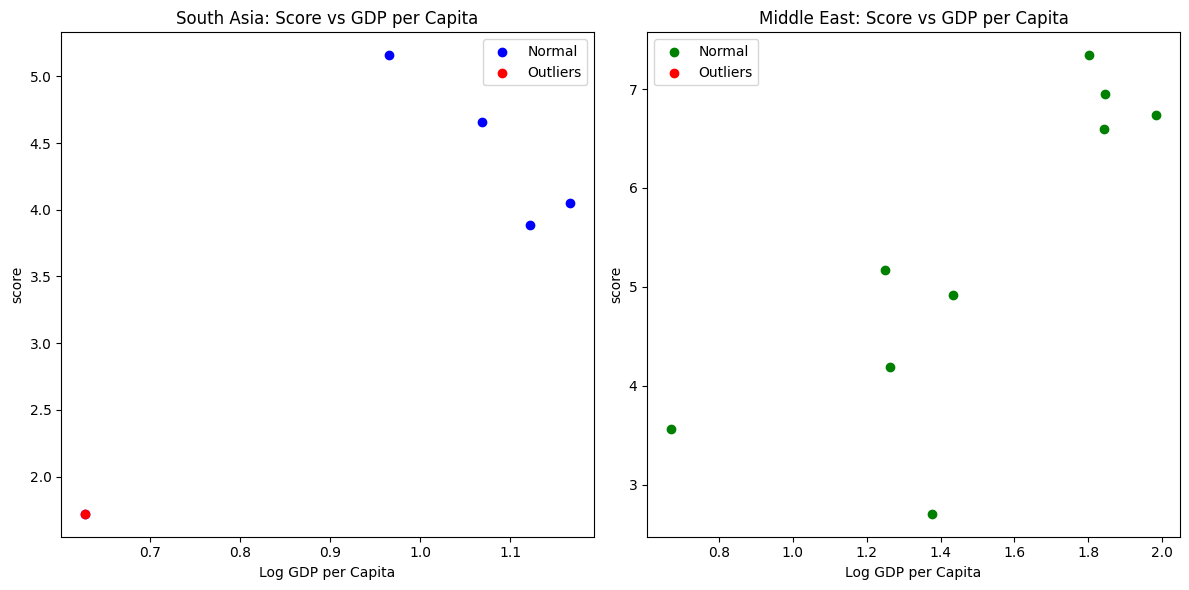

South Asia Outliers (based on Score and GDP per Capita):
  Country name  score  Log GDP per capita
4  Afghanistan  1.721               0.628
Middle East Outliers (based on Score and GDP per Capita):
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


In [80]:
#Calculating the IQR for Score and GDP per Capita in South Asia and Middle East
def calculate_iqr(data,column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    return Q1,Q3,IQR

#Calculating IQR for Score and GDP per Capita in both regions
south_asia_score_Q1,south_asia_score_Q3,south_asia_score_IQR=calculate_iqr(south_asia_data, 'score')
middle_east_score_Q1,middle_east_score_Q3, middle_east_score_IQR=calculate_iqr(middle_east_data, 'score')

south_asia_gdp_Q1,south_asia_gdp_Q3,south_asia_gdp_IQR=calculate_iqr(south_asia_data, 'Log GDP per capita')
middle_east_gdp_Q1,middle_east_gdp_Q3,middle_east_gdp_IQR=calculate_iqr(middle_east_data, 'Log GDP per capita')

#Defining outliers using 1.5*IQR rule
def detect_outliers(data,column,Q1,Q3,IQR):
    lower_bound=Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    outliers=data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

#Detecting outliers for both regions based on Score and GDP per Capita
south_asia_score_outliers=detect_outliers(south_asia_data,'score',south_asia_score_Q1,south_asia_score_Q3,south_asia_score_IQR)
middle_east_score_outliers=detect_outliers(middle_east_data,'score',middle_east_score_Q1,middle_east_score_Q3,middle_east_score_IQR)

south_asia_gdp_outliers=detect_outliers(south_asia_data,'Log GDP per capita',south_asia_gdp_Q1,south_asia_gdp_Q3,south_asia_gdp_IQR)
middle_east_gdp_outliers=detect_outliers(middle_east_data,'Log GDP per capita',middle_east_gdp_Q1,middle_east_gdp_Q3,south_asia_gdp_IQR)

#Creating scatter plot for South Asia and Middle East regions
plt.figure(figsize=(12,6))

#South Asia Plot
plt.subplot(1,2,1)
plt.scatter(south_asia_data['Log GDP per capita'],south_asia_data['score'],color='blue',label='Normal')
plt.scatter(south_asia_score_outliers['Log GDP per capita'], south_asia_score_outliers['score'],color='red',label='Outliers')
plt.title('South Asia: Score vs GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('score')
plt.legend()

#Middle East Plot
plt.subplot(1,2,2)
plt.scatter(middle_east_data['Log GDP per capita'],middle_east_data['score'],color='green',label='Normal')
plt.scatter(middle_east_score_outliers['Log GDP per capita'],middle_east_score_outliers['score'],color='red',label='Outliers')
plt.title('Middle East: Score vs GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('score')
plt.legend()

plt.tight_layout()
plt.show()

#Discuss outliers
print("South Asia Outliers (based on Score and GDP per Capita):")
print(south_asia_score_outliers[['Country name', 'score', 'Log GDP per capita']])
print("Middle East Outliers (based on Score and GDP per Capita):")
print(middle_east_score_outliers[['Country name', 'score', 'Log GDP per capita']])


Visualization

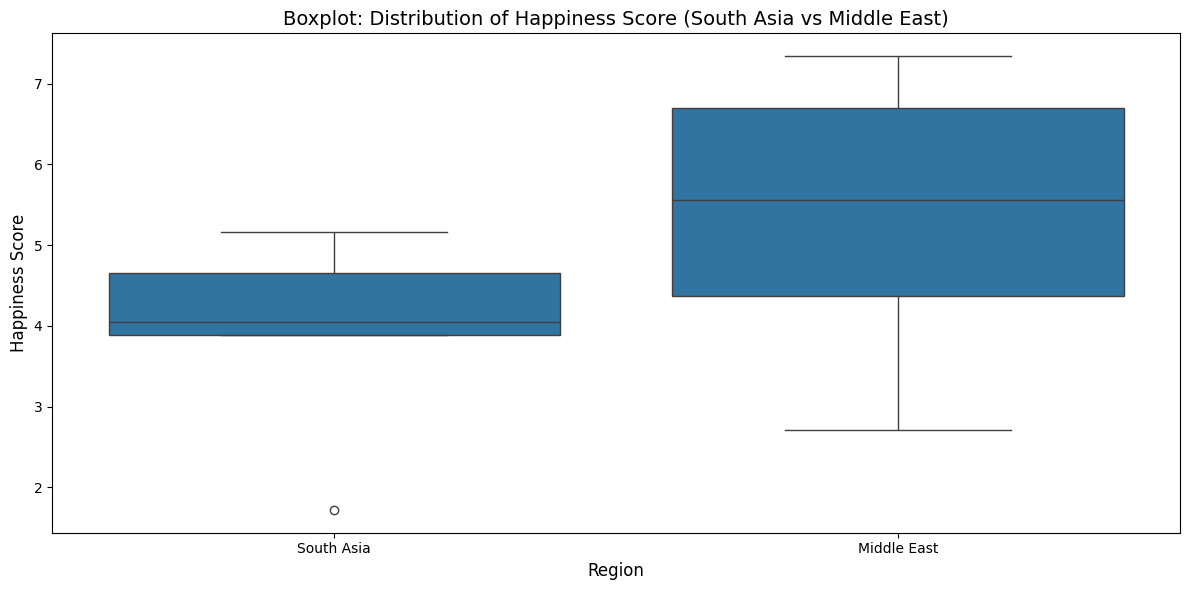

In [81]:
# Ensuring both regions have 'Region' columns by using .loc for proper assignment
south_asia_data=south_asia_data.copy()  # Create a copy to avoid SettingWithCopyWarning
middle_east_data=middle_east_data.copy()  # Create a copy to avoid SettingWithCopyWarning

# Adding 'Region' column to both datasets
south_asia_data['Region']='South Asia'
middle_east_data['Region']='Middle East'

# Combining the data into one DataFrame
combined_data=pd.concat([south_asia_data,middle_east_data],ignore_index=True)

# Checking the combined data structure for debugging only
#print(combined_data[['Region', 'score']].head())

# Creating the boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Region',y='score',data=combined_data)

# Adding title and labels
plt.title('Boxplot: Distribution of Happiness Score (South Asia vs Middle East)',fontsize=14)
plt.xlabel('Region',fontsize=12)
plt.ylabel('Happiness Score',fontsize=12)

# Displaying the plot
plt.tight_layout()  # Adjusting the layout for better spacing
plt.show()
#key difference in shapes,median and outliners.
#south asia shows imbalance distribution which means that some countries with low and high
#happiness score are being compared to each other.
#middle east shows normal distribution which means most countries are in normal range.
#median
#south asia has lower happiness score which means they are less happy.
#middle east has higher happiness score which means they are more happy than south asia.
#outliners
#there are more outliner in south asia which means some country has very low or very high
#happiness score.
#there are few or none outliner which means they have consistent happiness score.
